In [1]:
%matplotlib inline
import os, shutil
import sys
sys.path.append("..")
import numpy as np
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt

import flopy as flopy
import pyemu

In [2]:
import freyberg_setup
freyberg_setup.setup_pest_pp()
working_dir = freyberg_setup.WORKING_DIR_PP
pst_name = freyberg_setup.PST_NAME_PP

['.DS_Store', 'botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'hk.zones', 'ibound.ref', 'kzone.ref', 'mpath.in', 'potobs_group.csv', 'Process_output.py', 'really_noisy_heads.txt', 'run_true_model.py', 'strt.ref', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_pp
FloPy is using the following executable to run the model: /Users/jwhite/Dev/GW1876/activities/freyberg_pilot_points_1_create/freyberg_pp/mfnwt

                                  MODFLOW-NWT-SWR1 
 

# Set up pilot points network for Freyberg model

There are multiple approaches to implementing pilot points with PEST++.  

In this class, we will use some kick-ass pyemu sweetness

## Set up zones for where pilot points will be interpolated

We can have pilot point networks in multiple zones. In this case, we will make a simple zone file using `IBOUND` such that all active cells are in the same interpolation zone.

In [3]:
m = flopy.modflow.Modflow.load(freyberg_setup.MODEL_NAM,model_ws=working_dir,load_only=[])

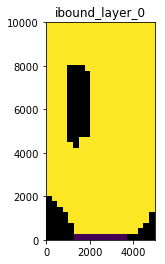

In [4]:
m.bas6.ibound[0].plot()

### We don't want pilot points or care about HK values in inactive cells, but we do need values in constant heads

In [13]:
df_pp = pyemu.gw_utils.setup_pilotpoints_grid(ml=m,prefix_dict={0:["hk"]},
                                              pp_dir=working_dir,tpl_dir=working_dir)
pp_file = os.path.join(working_dir,"hkpp.dat")
assert os.path.exists(pp_file)
df_pp

,name,x,y,zone,parval1,k,i,j,tpl,parnme,tpl_filename,pp_filename,pargp,parubnd,parlbnd,parchglim,scale,partrans,dercom,offset
0,pp_0000,125.0,9875.0,1.0,1.0,0.0,0.0,0.0,~ hk00 ~,hk00,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
1,pp_0001,1125.0,9875.0,1.0,1.0,0.0,0.0,4.0,~ hk01 ~,hk01,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
2,pp_0002,2125.0,9875.0,1.0,1.0,0.0,0.0,8.0,~ hk02 ~,hk02,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
3,pp_0003,3125.0,9875.0,1.0,1.0,0.0,0.0,12.0,~ hk03 ~,hk03,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
4,pp_0004,4125.0,9875.0,1.0,1.0,0.0,0.0,16.0,~ hk04 ~,hk04,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
5,pp_0005,125.0,8875.0,1.0,1.0,0.0,4.0,0.0,~ hk05 ~,hk05,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
6,pp_0006,1125.0,8875.0,1.0,1.0,0.0,4.0,4.0,~ hk06 ~,hk06,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
7,pp_0007,2125.0,8875.0,1.0,1.0,0.0,4.0,8.0,~ hk07 ~,hk07,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
8,pp_0008,3125.0,8875.0,1.0,1.0,0.0,4.0,12.0,~ hk08 ~,hk08,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
9,pp_0009,4125.0,8875.0,1.0,1.0,0.0,4.0,16.0,~ hk09 ~,hk09,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0


## Need to create Kriging factors and regularization inputs
Following the guidelines in _Approaches to Highly Parameterized Inversion: Pilot-Point Theory, Guidelines, and Research Directions_ https://pubs.usgs.gov/sir/2010/5168/

### First we need to define a couple geostatistical structures (e.g. variograms)

From _PEST Groundwater Data Utilities Part A: Overview_ page 43, there are 4 acceptable variogram types:

 1. *Spherical*  
### $\gamma\left(h\right)=c\times\left[1.5\frac{h}{a}-0.5\frac{h}{a}^3\right]$ if $h<a$
### $\gamma\left(h\right)=c$ if $h \ge a$  
     
 2. *Exponential*  
### $\gamma\left(h\right)=c\times\left[1-\exp\left(-\frac{h}{a}\right)\right]$  
     
 3. *Gaussian*  
### $\gamma\left(h\right)=c\times\left[1-\exp\left(-\frac{h^2}{a^2}\right)\right]$  
 
 4. *Power*  
### $\gamma\left(h\right)=c\times h^a$
     
 The number refers to `VARTYPE`. `BEARING` and `ANISOTROPY` only apply if there is a principal direction of anisotropy. $h$ is the separation distance, and $a$ is the range, expressed with the `A` parameter.


(0, 2.0)

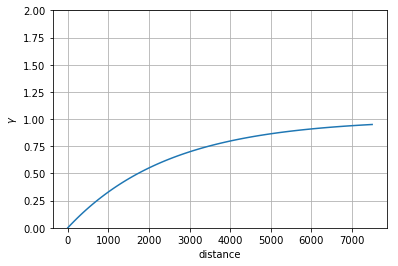

In [14]:
v = pyemu.geostats.ExpVario(contribution=1.0,a=2500)
gs = pyemu.geostats.GeoStruct(variograms=v,nugget=0.0)
ax = gs.plot()
ax.grid()
ax.set_ylim(0,2.0)

## Now we can make a response file for `ppk2fac.exe` which creates the Kriging factors and also regularization information we will need later.

In [15]:
ok = pyemu.geostats.OrdinaryKrige(gs,df_pp)

In [16]:
ok.calc_factors_grid(m.sr,var_filename=pst_name.replace(".pst",".var.ref"))

starting interp point loop for 800 points
took 2.525326


,x,y,idist,inames,ifacts,err_var
0,125.0,9875.0,[1e-07],[pp_0000],[1.0],0.000000
1,375.0,9875.0,"[250.0, 750.0, 1030.7764064, 1250.0, 1750.0, 2015.56443707, 2015.56443707, 2657.53645318, 2750.0...","[pp_0000, pp_0001, pp_0005, pp_0006, pp_0002, pp_0010, pp_0007, pp_0011, pp_0003, pp_0008, pp_00...","[0.714916173352, 0.226100533738, 0.0463257466132, 0.0343108869355, -0.00318483054752, -0.0090742...",0.141824
2,625.0,9875.0,"[500.0, 500.0, 1118.03398875, 1118.03398875, 1500.0, 1802.77563773, 2061.55281281, 2500.0, 2500....","[pp_0000, pp_0001, pp_0005, pp_0006, pp_0002, pp_0007, pp_0010, pp_0011, pp_0003, pp_0008, pp_00...","[0.458112831986, 0.464279682708, 0.0507832214576, 0.0571394079999, -0.00538898669886, -0.0116859...",0.187225
3,875.0,9875.0,"[250.0, 750.0, 1030.7764064, 1250.0, 1250.0, 1600.78105936, 2136.00093633, 2250.0, 2358.49528301...","[pp_0001, pp_0000, pp_0006, pp_0002, pp_0005, pp_0007, pp_0010, pp_0003, pp_0011, pp_0008, pp_00...","[0.720306107118, 0.222278527609, 0.0512172662126, -0.0050192314583, 0.0298809335909, -0.00896042...",0.141056
4,1125.0,9875.0,[1e-07],[pp_0001],[1.0],0.000000
5,1375.0,9875.0,"[250.0, 750.0, 1030.7764064, 1250.0, 1250.0, 1600.78105936, 1750.0, 2015.56443707, 2136.00093633...","[pp_0001, pp_0002, pp_0006, pp_0000, pp_0007, pp_0005, pp_0003, pp_0008, pp_0011, pp_0010, pp_00...","[0.720071380918, 0.225831571414, 0.0502682230383, -0.00377950077343, 0.0340344311918, -0.0090035...",0.138820
6,1625.0,9875.0,"[500.0, 500.0, 1118.03398875, 1118.03398875, 1500.0, 1500.0, 1802.77563773, 1802.77563773, 2061....","[pp_0001, pp_0002, pp_0006, pp_0007, pp_0000, pp_0003, pp_0005, pp_0008, pp_0011, pp_0012, pp_00...","[0.463915265181, 0.463927911407, 0.0556422675948, 0.0571116588881, -0.00356038849409, -0.0053096...",0.183629
7,1875.0,9875.0,"[250.0, 750.0, 1030.7764064, 1250.0, 1250.0, 1600.78105936, 1750.0, 2015.56443707, 2015.56443707...","[pp_0002, pp_0001, pp_0007, pp_0003, pp_0006, pp_0008, pp_0000, pp_0005, pp_0011, pp_0004, pp_00...","[0.720066976336, 0.225809382816, 0.0515010984871, -0.00498558512655, 0.0330257598254, -0.0089394...",0.138574
8,2125.0,9875.0,[1e-07],[pp_0002],[1.0],0.000000
9,2375.0,9875.0,"[250.0, 750.0, 1030.7764064, 1250.0, 1250.0, 1600.78105936, 1750.0, 2015.56443707, 2015.56443707...","[pp_0002, pp_0003, pp_0007, pp_0001, pp_0008, pp_0006, pp_0004, pp_0009, pp_0011, pp_0012, pp_00...","[0.720044483018, 0.22572621667, 0.0515762096379, -0.00494504266101, 0.0341793080808, -0.00970236...",0.138580


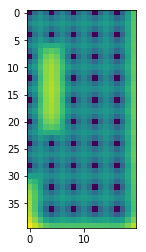

In [17]:
arr_var = np.loadtxt(pst_name.replace(".pst",".var.ref"))
plt.imshow(arr_var,interpolation="nearest")

In [21]:
ok.to_grid_factors_file(pp_file+".fac")

In [19]:
df_pp

,name,x,y,zone,parval1,k,i,j,tpl,parnme,tpl_filename,pp_filename,pargp,parubnd,parlbnd,parchglim,scale,partrans,dercom,offset
name,,,,,,,,,,,,,,,,,,,,
pp_0000,pp_0000,125.0,9875.0,1.0,1.0,0.0,0.0,0.0,~ hk00 ~,hk00,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
pp_0001,pp_0001,1125.0,9875.0,1.0,1.0,0.0,0.0,4.0,~ hk01 ~,hk01,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
pp_0002,pp_0002,2125.0,9875.0,1.0,1.0,0.0,0.0,8.0,~ hk02 ~,hk02,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
pp_0003,pp_0003,3125.0,9875.0,1.0,1.0,0.0,0.0,12.0,~ hk03 ~,hk03,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
pp_0004,pp_0004,4125.0,9875.0,1.0,1.0,0.0,0.0,16.0,~ hk04 ~,hk04,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
pp_0005,pp_0005,125.0,8875.0,1.0,1.0,0.0,4.0,0.0,~ hk05 ~,hk05,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
pp_0006,pp_0006,1125.0,8875.0,1.0,1.0,0.0,4.0,4.0,~ hk06 ~,hk06,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
pp_0007,pp_0007,2125.0,8875.0,1.0,1.0,0.0,4.0,8.0,~ hk07 ~,hk07,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0
pp_0008,pp_0008,3125.0,8875.0,1.0,1.0,0.0,4.0,12.0,~ hk08 ~,hk08,freyberg_pp/hkpp.dat.tpl,freyberg_pp/hkpp.dat,hk,1.100000e+10,1.100000e-10,factor,1.0,log,1,0.0


In [31]:
df_pp.loc[:,"parval1"] = np.random.random(df_pp.shape[0])
pyemu.gw_utils.write_pp_file(pp_file,df_pp)

In [32]:

hk_arr = pyemu.gw_utils.fac2real(pp_file,factors_file=pp_file+".fac",out_file=os.path.join(working_dir,"hk_layer_1.ref"))

In [33]:
hk_arr = np.loadtxt(hk_arr)


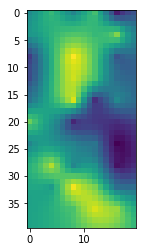

In [34]:
plt.imshow(hk_arr,interpolation="nearest")